# CLASSIFY KYPHOSIS DISEASE

# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [2]:
data = pd.read_csv("kyphosis.csv")

In [3]:
data.shape

(81, 4)

In [4]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
data.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

# VISUALIZING DATA

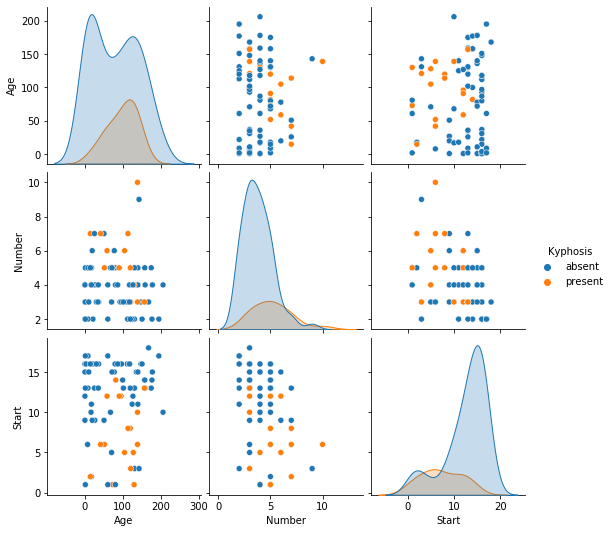

In [8]:
sns.pairplot(data,hue='Kyphosis',vars=['Age','Number','Start'])

C:\Users\bhara_5sejtsc\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


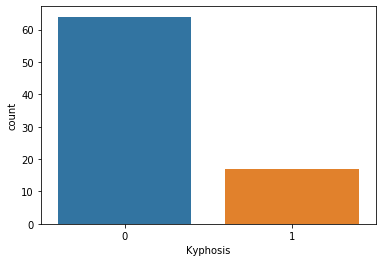

In [20]:
sns.countplot(data['Kyphosis'],label='count')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
data['Kyphosis']=LabelEncoder().fit_transform(data['Kyphosis'])

In [19]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


# TRAINING DATA AND TESTING DATA

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('Kyphosis',axis=1)

In [26]:
y = data['Kyphosis']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [128]:
X_train.shape

(60, 3)

In [129]:
X_test.shape

(21, 3)

In [130]:
y_train.shape

(60,)

In [131]:
y_test.shape

(21,)

# MODEL TRAINING

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=25)

In [133]:
feature_importance = pd.DataFrame(dtc.feature_importances_ , index=X_train.columns,columns=['Importance'])

In [134]:
feature_importance

,Importance
Age,0.399649
Number,0.191964
Start,0.408387


In [135]:
feature_importance = pd.DataFrame(dtc.feature_importances_,index=X_train.columns, columns = ['Importance']).sort_values('Importance',ascending = False)

In [136]:
feature_importance

,Importance
Start,0.408387
Age,0.399649
Number,0.191964


# TESTING AND EVALUATING THE MODEL

In [137]:
y_pred = dtc.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [139]:
cm = confusion_matrix(y_test,y_pred)

In [140]:
print(cm)

[[13  3]
 [ 2  3]]


In [141]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [142]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.60      0.50      0.55         6

    accuracy                           0.76        21
   macro avg       0.71      0.68      0.69        21
weighted avg       0.75      0.76      0.75        21



# IMPROVING THE MODEL

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 100)

In [145]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=100)

In [146]:
y_pred = rfc.predict(X_test)

In [147]:
cm = confusion_matrix(y_test,y_pred)

In [148]:
print(cm)

[[14  2]
 [ 3  2]]


In [149]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.50      0.40      0.44         5

    accuracy                           0.76        21
   macro avg       0.66      0.64      0.65        21
weighted avg       0.75      0.76      0.75        21

